In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

Reads the dataset named 'Heart Disease indicator (version 1).csv' into a pandas DataFrame called data. 
This is the first step in loading the data for analysis.   



In [2]:
# load the dataset
data=pd.read_csv('Heart Disease indicator (version 1).csv')

# Exploratory Data Analysis

This provides a quick preview of the data, showing the column names and the initial entries, which is useful for understanding the data structure and content.


In [3]:
# Check the 5 rows of the dataset
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,No
1,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,No
2,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
3,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
4,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


It shows the number of rows and columns, the names of each column, the number of non-null values in each column, and the data type of each column. This output indicates that the dataset has 246,022 entries and 39 columns, with most columns being of object type (strings) and a few being integers (int64) or floating-point numbers (float64). Crucially, it shows that there are no missing values in any of the columns at this stage.   

In [4]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  object 
 1   GeneralHealth              246022 non-null  object 
 2   PhysicalHealthDays         246022 non-null  int64  
 3   MentalHealthDays           246022 non-null  int64  
 4   LastCheckupTime            246022 non-null  object 
 5   PhysicalActivities         246022 non-null  object 
 6   SleepHours                 246022 non-null  int64  
 7   RemovedTeeth               246022 non-null  object 
 8   HadAngina                  246022 non-null  object 
 9   HadStroke                  246022 non-null  object 
 10  HadAsthma                  246022 non-null  object 
 11  HadSkinCancer              246022 non-null  object 
 12  HadCOPD                    246022 non-null  object 
 13  HadDepressiveDisorder      24

 Calculates the sum of missing values for each column. The output confirms that there are no missing values in any of the columns after loading the data.   

In [5]:
# Check for the missing values
data.isna().sum()

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesti

Calculates the number of duplicate rows in the DataFrame. The output shows that there are 36 duplicate rows.

In [6]:
# Check for the duplicate
data.duplicated().sum()

36

Removes the duplicate rows from the DataFrame. keep='first' ensures that the first occurrence of a duplicate row is kept, and inplace=True modifies the DataFrame directly.

In [7]:
# Drop the duplicate found and keep first 
data.drop_duplicates(keep='first', inplace=True)

It first drops any rows where 'AgeCategory' might be NaN (although the previous check showed no NaNs, this is a safeguard). Then, it processes the strings in the 'AgeCategory' column to remove the word "Age" and any leading/trailing spaces. This standardizes the entries in this column.

In [8]:
# Drop rows with NaN values in the 'AgeCategory' column
data.dropna(subset=['AgeCategory'], inplace=True)

# Split the data by lines
lines = data['AgeCategory'].str.strip().str.split("\n")

# Remove the "Age" string from each line
cleaned_lines = []
for line in lines:
    if isinstance(line, list):
        cleaned_lines.append([item.replace("Age", "").strip() for item in line])
    else:
        cleaned_lines.append([])

# Join the cleaned lines back into a single string
cleaned_data = ["\n".join(line) for line in cleaned_lines]

# Replace the original 'AgeCategory' column with the cleaned data
data['AgeCategory'] = cleaned_data

Generates descriptive statistics for the numerical columns in the DataFrame. The output table provides count, mean, standard deviation, minimum, maximum, and quartile values for 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', and 'BMI'. This gives a summary of the distribution and range of these numerical features.

In [9]:
# Check  for the data statistics
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,245986.000000,245986.000000,245986.000000,245986.000000,245986.000000,245986.000000
mean,4.119507,4.167745,7.021253,1.705150,83.616621,28.668650
std,8.406153,8.103125,1.440751,0.106655,21.323718,6.514194
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


Sets the visual style of the plots to a dark grid background, which is often preferred for presentations and readability

In [10]:
# Set the style to dark grid
sns.set(style="darkgrid")

In [11]:
#investigate the Gender against heart disease whether to resampling it
data.groupby('Sex')['HeartDisease'].value_counts()

Sex     HeartDisease
Female  No              122858
        Yes               4932
Male    No              109693
        Yes               8503
Name: count, dtype: int64

This code groups the data by 'Sex' and 'HeartDisease' and then counts the occurrences of each combination. The output shows the number of males and females with and without heart disease. It indicates that there are more females than males in the dataset, and within both sexes, the number of individuals without heart disease is significantly higher than those with heart disease. There are more males with heart disease (8503) than females (4932).

In [12]:
#investigate the Gender against heart disease whether to resampling it
data.groupby('RaceEthnicityCategory')['HeartDisease'].value_counts()

RaceEthnicityCategory          HeartDisease
Black only, Non-Hispanic       No               18441
                               Yes                889
Hispanic                       No               21711
                               Yes                859
Multiracial, Non-Hispanic      No                5241
                               Yes                340
Other race only, Non-Hispanic  No               11614
                               Yes                591
White only, Non-Hispanic       No              175544
                               Yes              10756
Name: count, dtype: int64

This code groups data by 'RaceEthnicityCategory' and 'HeartDisease' and counts the occurrences. The output shows the distribution of heart disease within different racial and ethnic groups. The 'White only, Non-Hispanic' category has the highest counts for both with and without heart disease, likely due to being the largest group in the dataset.

In [13]:
# Investigate the distribution of Sex against HeartDisease within each RaceEthnicityCategory
data.groupby(['RaceEthnicityCategory', 'Sex'])['HeartDisease'].value_counts()

RaceEthnicityCategory          Sex     HeartDisease
Black only, Non-Hispanic       Female  No              10834
                                       Yes               449
                               Male    No               7607
                                       Yes               440
Hispanic                       Female  No              11411
                                       Yes               361
                               Male    No              10300
                                       Yes               498
Multiracial, Non-Hispanic      Female  No               2693
                                       Yes               126
                               Male    No               2548
                                       Yes               214
Other race only, Non-Hispanic  Female  No               5763
                                       Yes               205
                               Male    No               5851
                                 

This code performs a more detailed grouping by 'RaceEthnicityCategory', 'Sex', and 'HeartDisease', counting the occurrences of each combination. This output provides a breakdown of heart disease counts within each race/ethnicity category, separated by sex. It allows for examining potential differences in heart disease prevalence among males and females within specific racial and ethnic groups

In [14]:
# Investigate the distribution of Sex against HeartDisease within each RaceEthnicityCategory
data.groupby(['GeneralHealth', 'PhysicalActivities'])['HeartDisease'].value_counts()

GeneralHealth  PhysicalActivities  HeartDisease
Excellent      No                  No               4378
                                   Yes               101
               Yes                 No              36537
                                   Yes               493
Fair           No                  No              11018
                                   Yes              1654
               Yes                 No              15892
                                   Yes              2094
Good           No                  No              18245
                                   Yes              1408
               Yes                 No              54563
                                   Yes              3191
Poor           No                  No               4311
                                   Yes              1288
               Yes                 No               3095
                                   Yes               736
Very good      No                  No   

The output shows the relationship between self-reported general health, engagement in physical activities, and the presence of heart disease. It suggests that individuals with better general health and those who are physically active tend to have lower counts of heart disease.

In [15]:
# Investigate the distribution of Sex against HeartDisease within each RaceEthnicityCategory
data.groupby(['SmokerStatus', 'AlcoholDrinkers'])['HeartDisease'].value_counts()

SmokerStatus                           AlcoholDrinkers  HeartDisease
Current smoker - now smokes every day  No               No               9556
                                                        Yes              1108
                                       Yes              No              10302
                                                        Yes               693
Current smoker - now smokes some days  No               No               2881
                                                        Yes               330
                                       Yes              No               4665
                                                        Yes               223
Former smoker                          No               No              26053
                                                        Yes              3242
                                       Yes              No              36858
                                                        Yes              

The output reveals the relationship between smoking status, alcohol consumption, and heart disease. It provides counts for different combinations, allowing for an analysis of how these habits relate to heart disease prevalence.   

Sets the default size for matplotlib figures to 10 inches wide and 6 inches tall. This ensures that the plots created later will have a consistent and reasonable size.   



In [16]:
# Set the style for better visualizations
plt.rcParams['figure.figsize'] = (10, 6)

Correlation Matrix for Numerical Features:


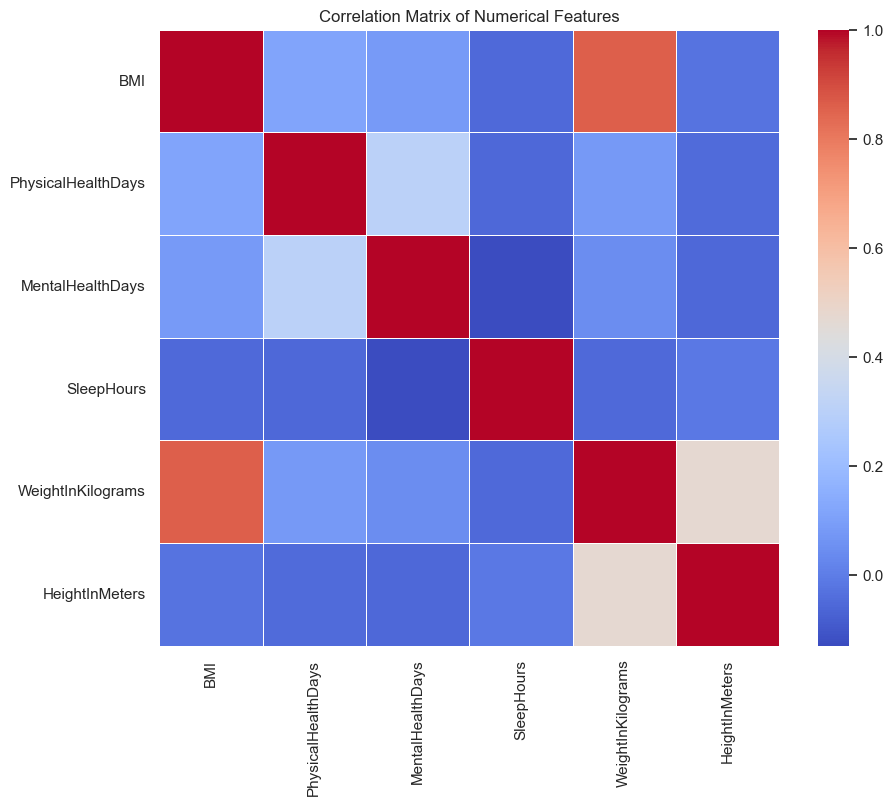

In [17]:
#Correlation Matrix for Numerical Features
# Select numerical columns
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'HeightInMeters']
print("Correlation Matrix for Numerical Features:")
corr_matrix = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The heatmap visually represents the correlation coefficients. Red colors indicate positive correlation, blue colors indicate negative correlation, and values close to zero indicate weak correlation. The annotations on each cell show the exact correlation value. This graph helps identify which numerical features are linearly related to each other. For example, 'WeightInKilograms' and 'BMI' are highly positively correlated, which is expected.   


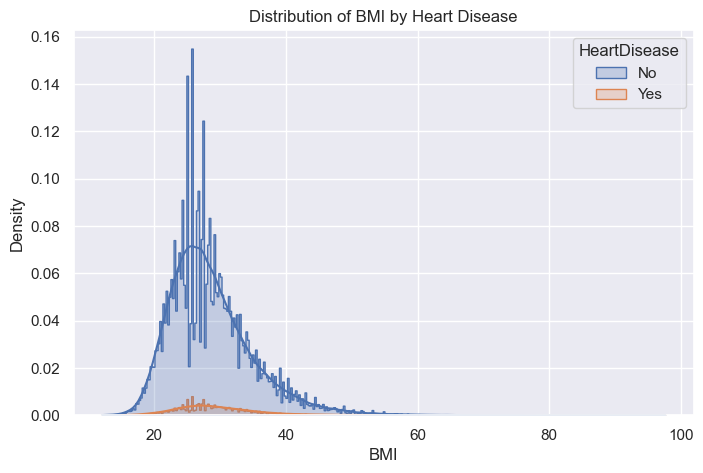

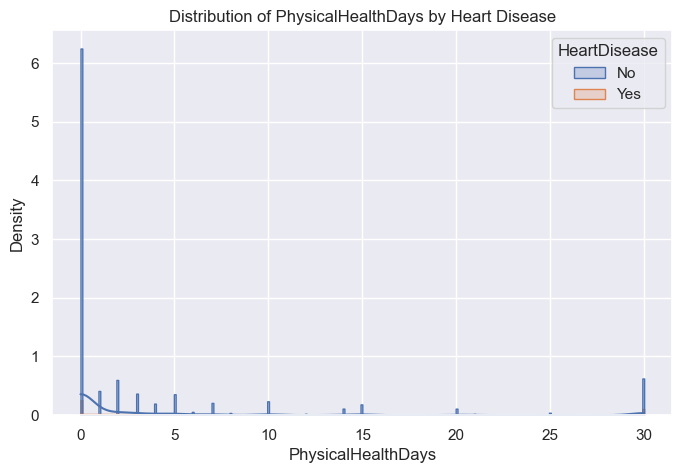

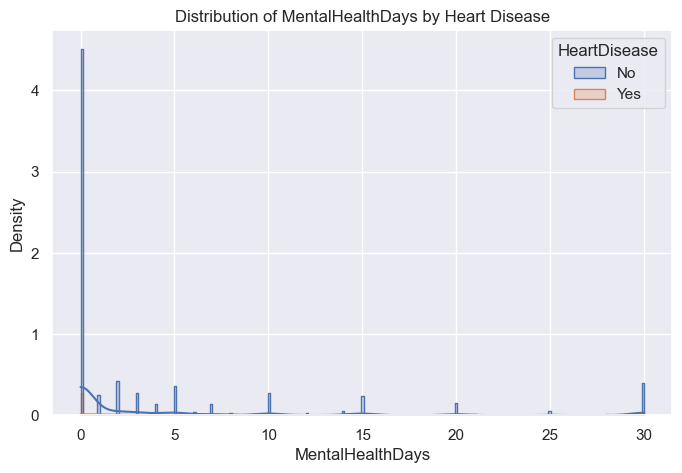

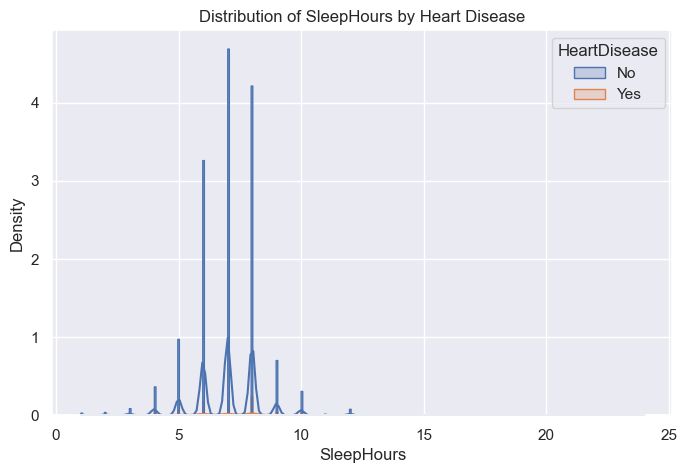

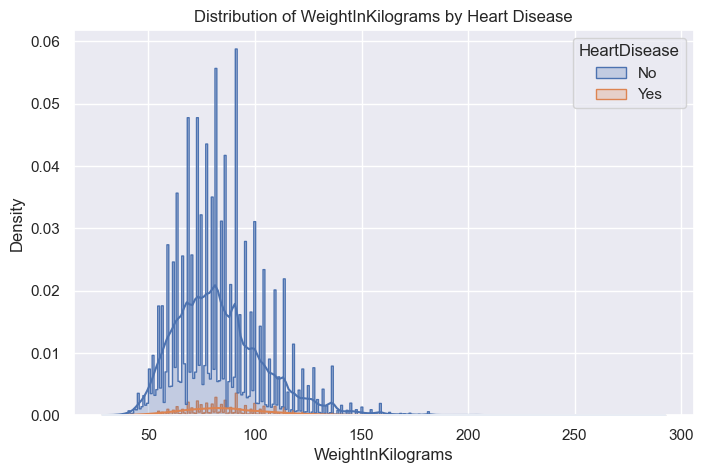

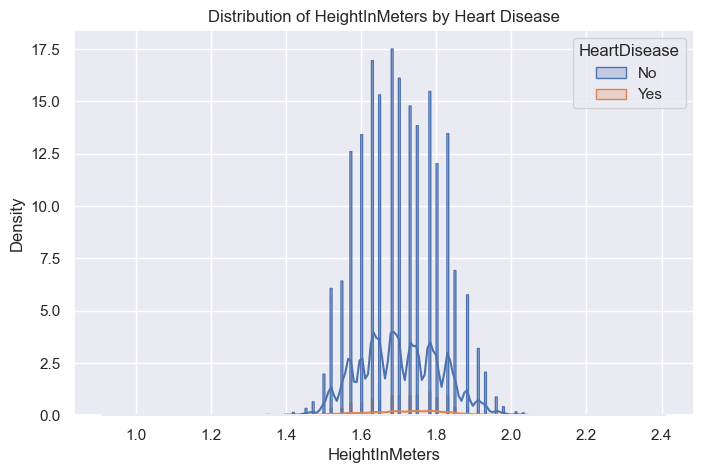

In [18]:
# Distribution of Numerical Features by HeartDisease
# Plot distributions of numerical features with respect to the target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=col, hue='HeartDisease', kde=True, element='step', stat='density')
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.show()

For each numerical feature, a histogram is generated. The overlayed distributions for 'HeartDisease: No' and 'HeartDisease: Yes' allow for a visual comparison of how the numerical feature's values differ between the two groups. This helps in understanding if a particular numerical feature has a noticeably different distribution for individuals with heart disease.

This block defines a list called categorical_cols containing the names of all categorical columns in the DataFrame, excluding the target variable 'HeartDisease'. This list is used in subsequent analyses and visualizations focusing on categorical features. 

In [19]:
# Step 4: Countplot for Categorical Features by HeartDisease
# Select categorical columns (excluding the target variable)
categorical_cols = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 
                   'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 
                   'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
                   'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 
                   'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 
                   'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 
                   'CovidPos']

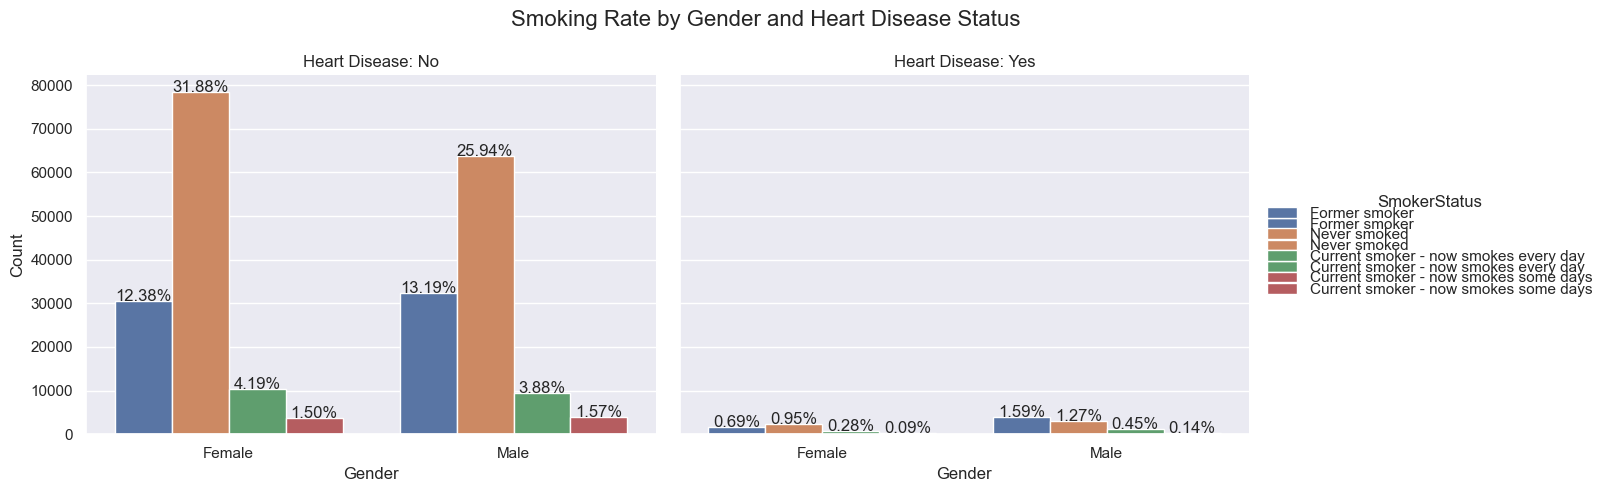

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid countplot with 'HeartDisease' as the column facet
g = sns.catplot(
    x="Sex",
    hue="SmokerStatus",
    col="HeartDisease",
    data=data,
    kind="count",
    height=5,
    aspect=1
)

# Add percentages on top of each bar
total = len(data)
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.05, 
            f'{height/total:.2%}', 
            ha="center"
        )

# Set titles and labels
g.set_titles("Heart Disease: {col_name}")
g.set_axis_labels("Gender", "Count")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Smoking Rate by Gender and Heart Disease Status", fontsize=16)
g.add_legend()

plt.show()

The output is a grid of two countplots, one for 'HeartDisease: No' and one for 'HeartDisease: Yes'. Each plot shows the counts of males and females, further divided by their smoking status. The percentages on top of the bars provide a clear indication of the proportion of each subgroup within the entire dataset. The title indicates that the plot shows the "Smoking Rate by Gender and Heart Disease Status".

In [21]:
# Step 6: Chi-Square Test for Categorical Features
# To test the relationship between categorical features and HeartDisease
print("Chi-Square Test Results for Categorical Features:")
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-Square Test Results for Categorical Features:
Sex: Chi2 = 1321.63, p-value = 0.0000
GeneralHealth: Chi2 = 9891.23, p-value = 0.0000
LastCheckupTime: Chi2 = 1241.00, p-value = 0.0000
PhysicalActivities: Chi2 = 1700.82, p-value = 0.0000
RemovedTeeth: Chi2 = 6994.79, p-value = 0.0000
HadAngina: Chi2 = 48900.04, p-value = 0.0000
HadStroke: Chi2 = 7715.12, p-value = 0.0000
HadAsthma: Chi2 = 138.43, p-value = 0.0000
HadSkinCancer: Chi2 = 599.80, p-value = 0.0000
HadCOPD: Chi2 = 4363.05, p-value = 0.0000
HadDepressiveDisorder: Chi2 = 137.81, p-value = 0.0000
HadKidneyDisease: Chi2 = 2938.97, p-value = 0.0000
HadArthritis: Chi2 = 3410.48, p-value = 0.0000
HadDiabetes: Chi2 = 5344.74, p-value = 0.0000
DeafOrHardOfHearing: Chi2 = 2344.20, p-value = 0.0000
BlindOrVisionDifficulty: Chi2 = 1307.82, p-value = 0.0000
DifficultyConcentrating: Chi2 = 655.53, p-value = 0.0000
DifficultyWalking: Chi2 = 6285.45, p-value = 0.0000
DifficultyDressingBathing: Chi2 = 1696.02, p-value = 0.0000
DifficultyErr

The output is a list of chi-square test results for each categorical feature. A very small p-value (close to 0.0000) for a feature suggests that there is a statistically significant association between that feature and 'HeartDisease', meaning the observed relationship is unlikely to be due to random chance. All categorical features show a p-value of 0.0000, indicating a strong association with Heart Disease. 

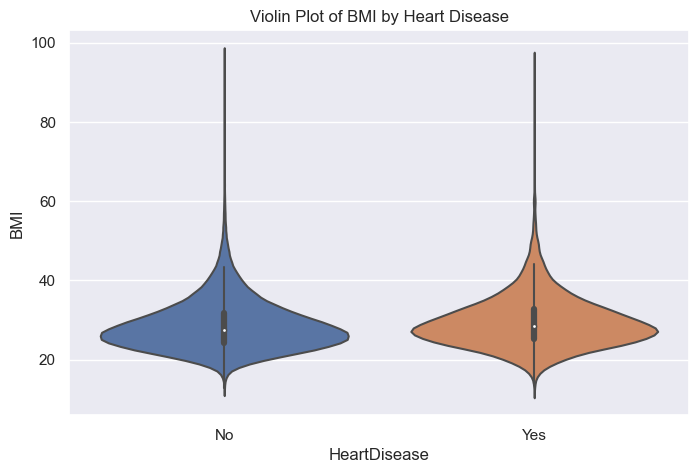

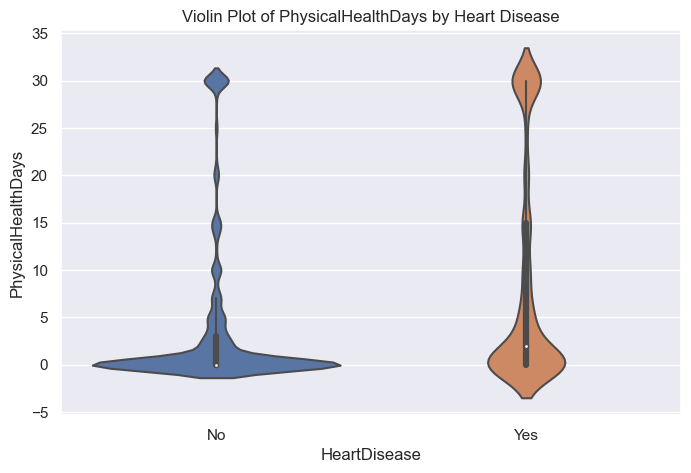

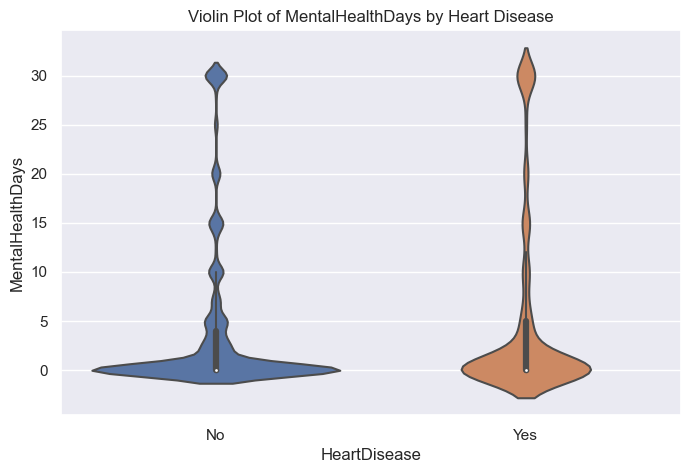

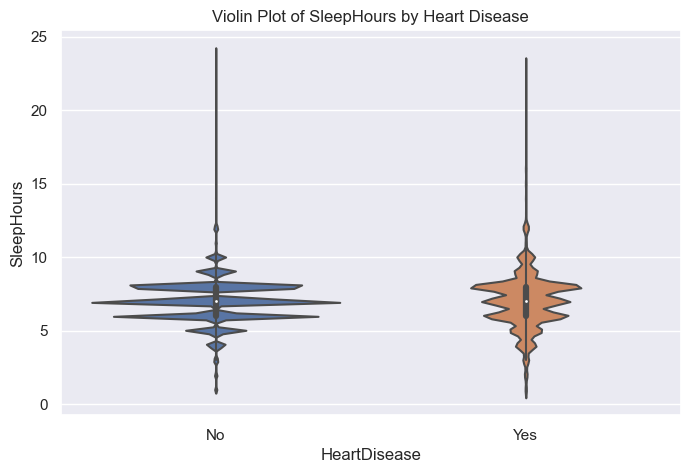

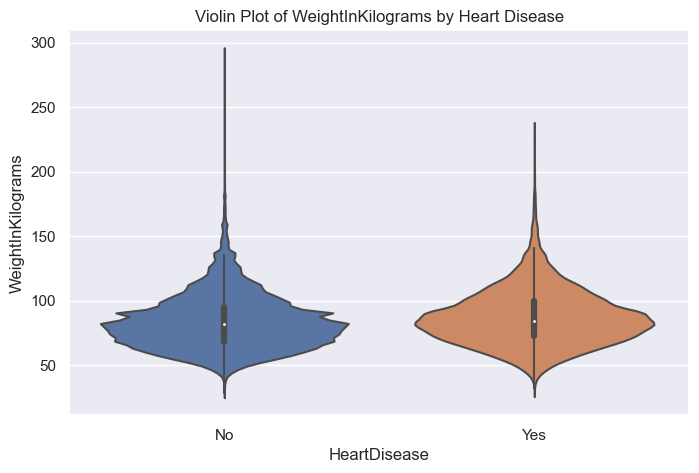

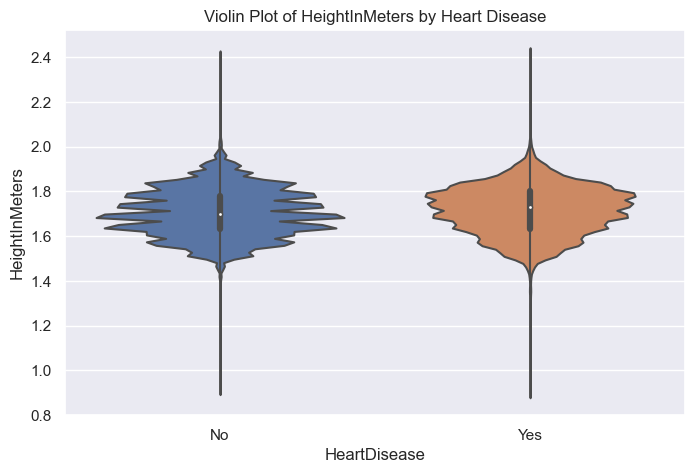

In [22]:
# Step 8: Violin Plot for Numerical Features by HeartDisease
# To see the distribution and density of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='HeartDisease', y=col, data=data)
    plt.title(f'Violin Plot of {col} by Heart Disease')
    plt.show()

For each numerical feature, a violin plot is displayed. Violin plots show the distribution of the data, similar to a box plot, but also include a kernel density estimate to show the probability density of the data at different values. This allows for a visual comparison of the shape and spread of the numerical feature's distribution for individuals with and without heart disease.

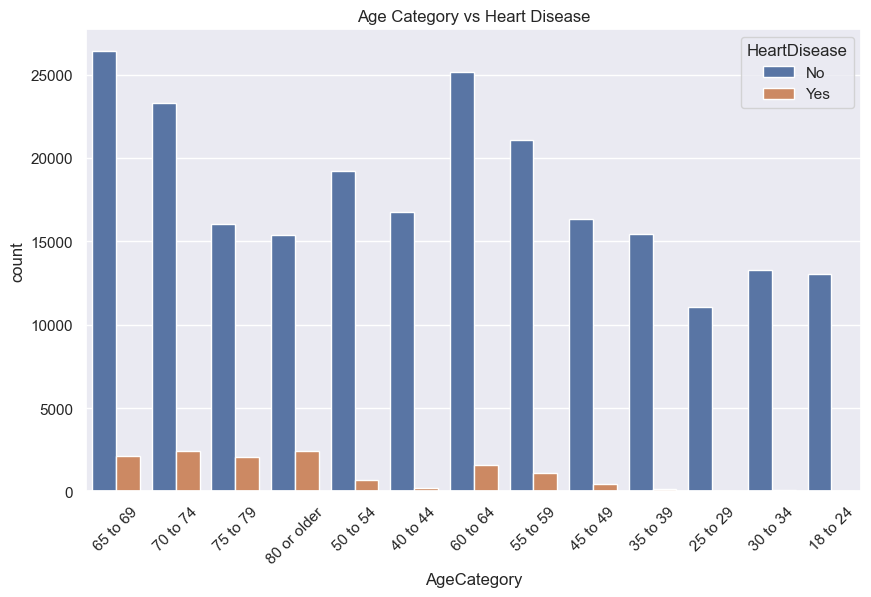

In [23]:
# Step 9: Relationship Between Age and HeartDisease
# Bar plot for AgeCategory by HeartDisease
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=data)
plt.title('Age Category vs Heart Disease')
plt.xticks(rotation=45)
plt.show()

The countplot shows the number of individuals in each age category, broken down by whether they have heart disease or not. This graph helps visualize how the prevalence of heart disease varies across different age groups. It is expected that older age categories would have a higher number of individuals with heart disease. 

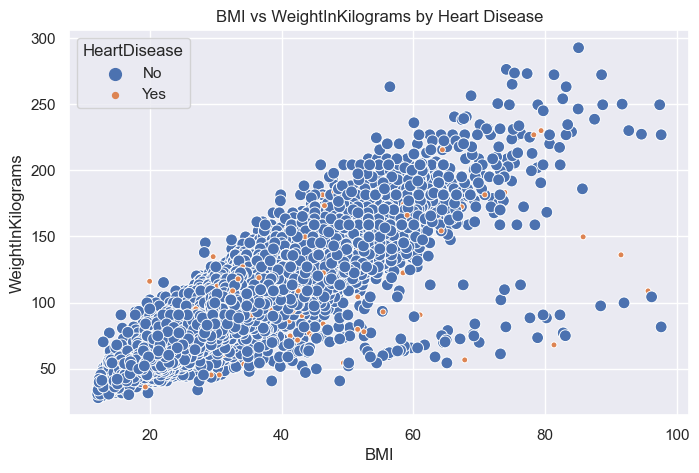

In [24]:
# Step 10: BMI vs WeightInKilograms Scatterplot by HeartDisease
# Scatterplot to see the relationship between BMI and Weight, colored by HeartDisease
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='WeightInKilograms', hue='HeartDisease', size='HeartDisease', data=data)
plt.title('BMI vs WeightInKilograms by Heart Disease')
plt.show()

The scatterplot displays individual data points representing BMI and WeightInKilograms. The color of each point indicates whether the individual has heart disease. This graph helps visualize the expected strong positive correlation between BMI and WeightInKilograms and allows for a visual inspection of whether individuals with heart disease tend to cluster in certain areas of the plot. 

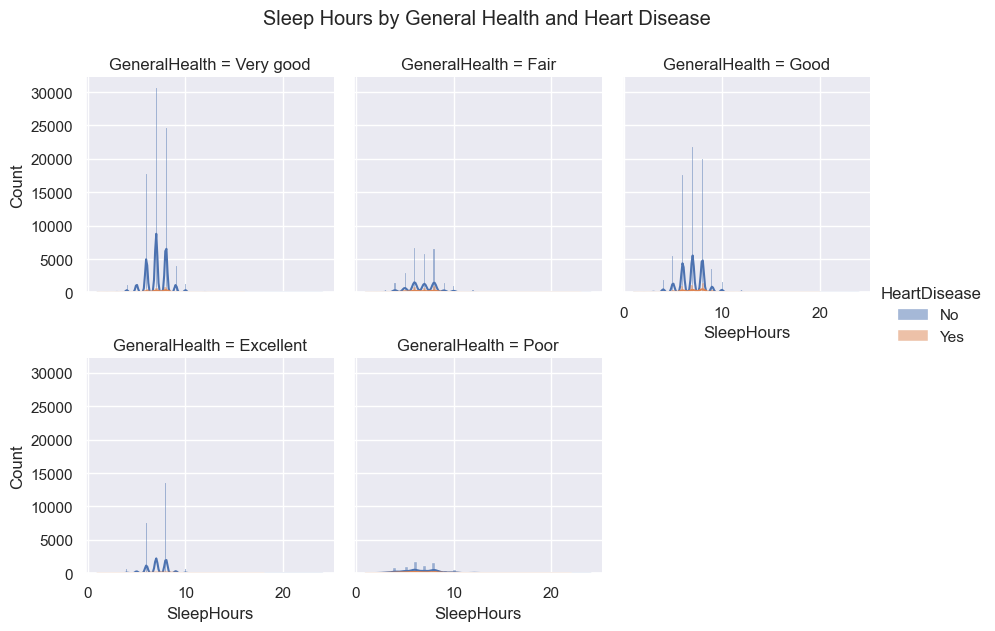

In [25]:
# Step 11: FacetGrid for SleepHours by GeneralHealth and HeartDisease
# To explore the relationship between SleepHours, GeneralHealth, and HeartDisease
g = sns.FacetGrid(data, col='GeneralHealth', hue='HeartDisease', col_wrap=3)
g.map(sns.histplot, 'SleepHours', kde=True)
g.add_legend()
plt.suptitle('Sleep Hours by General Health and Heart Disease', y=1.05)
plt.show()

The output is a grid of histograms showing the distribution of 'SleepHours' for each category of 'GeneralHealth', with the distributions for individuals with and without heart disease overlaid. This allows for a detailed examination of how sleep hours are distributed within different general health levels and whether there are noticeable differences in sleep patterns for those with heart disease. 

<Figure size 800x500 with 0 Axes>

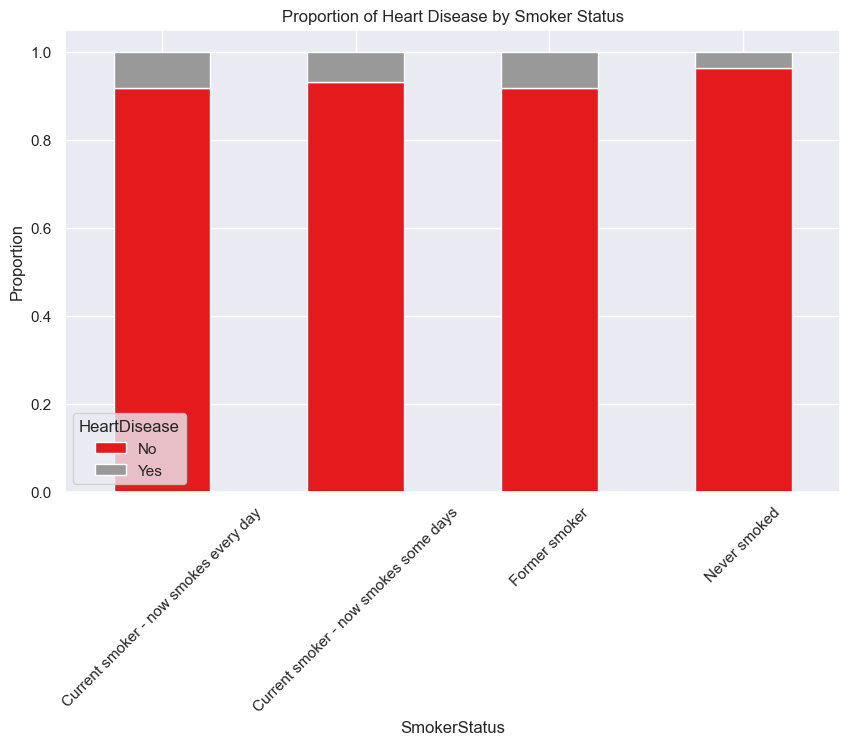

In [26]:
# Step 12: Relationship Between Smoking and HeartDisease
# Stacked bar plot for SmokerStatus and ECigaretteUsage
plt.figure(figsize=(8, 5))
pd.crosstab(data['SmokerStatus'], data['HeartDisease'], normalize='index').plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Proportion of Heart Disease by Smoker Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

The stacked bar plot shows, for each smoking status, the proportion of individuals who have heart disease (e.g., the red portion of the bar) and who do not (e.g., the blue portion). This visualization makes it easy to compare the prevalence of heart disease across different smoking statuses. The <Figure size 800x500 with 0 Axes> output is just information about the figure object creation.

<Figure size 800x500 with 0 Axes>

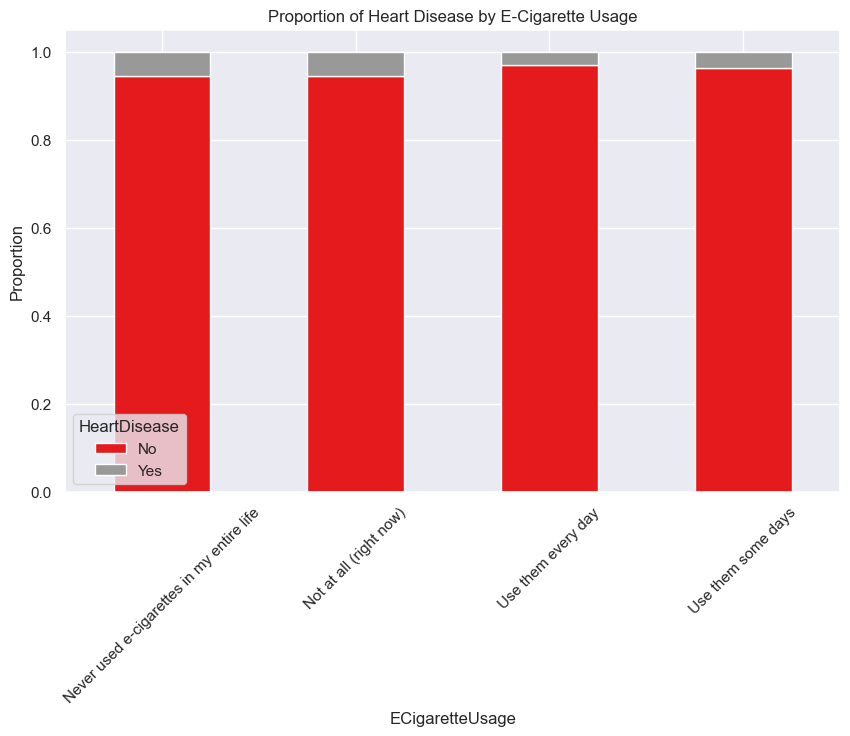

In [27]:
plt.figure(figsize=(8, 5))
pd.crosstab(data['ECigaretteUsage'], data['HeartDisease'], normalize='index').plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Proportion of Heart Disease by E-Cigarette Usage')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

The stacked bar plot shows the proportion of heart disease within each e-cigarette usage category. This allows for a comparison of heart disease prevalence among different groups based on their e-cigarette usage habits.

Text(0.5, 1.0, 'Number of Males and Females in the dataset')

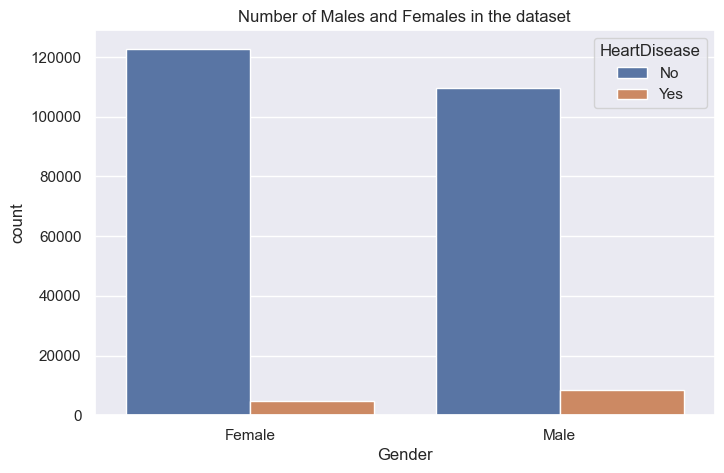

In [29]:
#visualise Gender against the heart disease
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Sex',hue='HeartDisease')
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')

The countplot shows the number of males and females in the dataset, with bars segmented by whether they have heart disease. This provides a visual representation of the distribution of heart disease within each gender.

<Figure size 800x500 with 0 Axes>

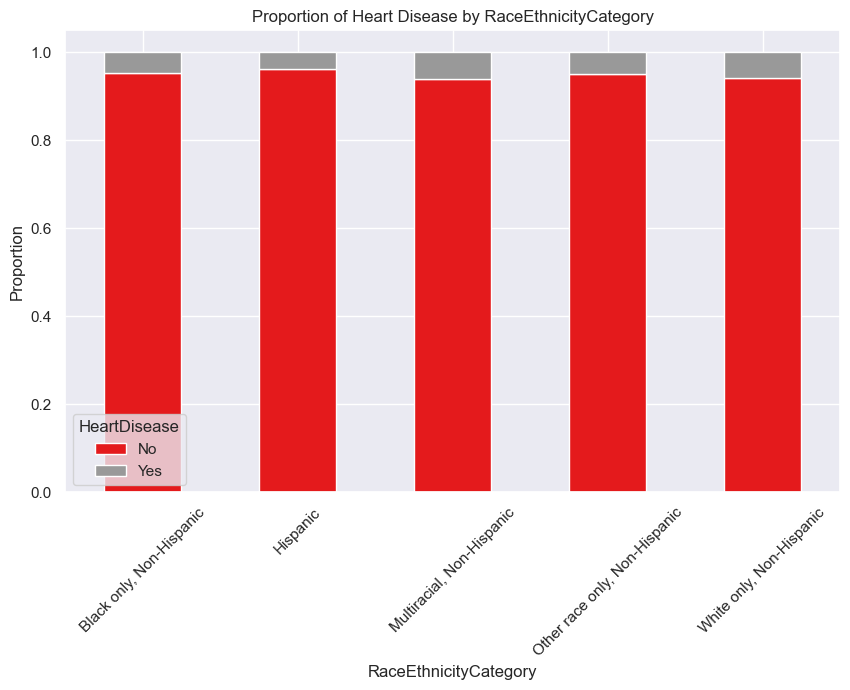

In [32]:
plt.figure(figsize=(8, 5))
pd.crosstab(data['RaceEthnicityCategory'], data['HeartDisease'], normalize='index').plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Proportion of Heart Disease by RaceEthnicityCategory')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

The stacked bar plot displays, for each race and ethnicity category, the proportion of individuals with and without heart disease. This helps in comparing the relative prevalence of heart disease across different racial and ethnic groups. 

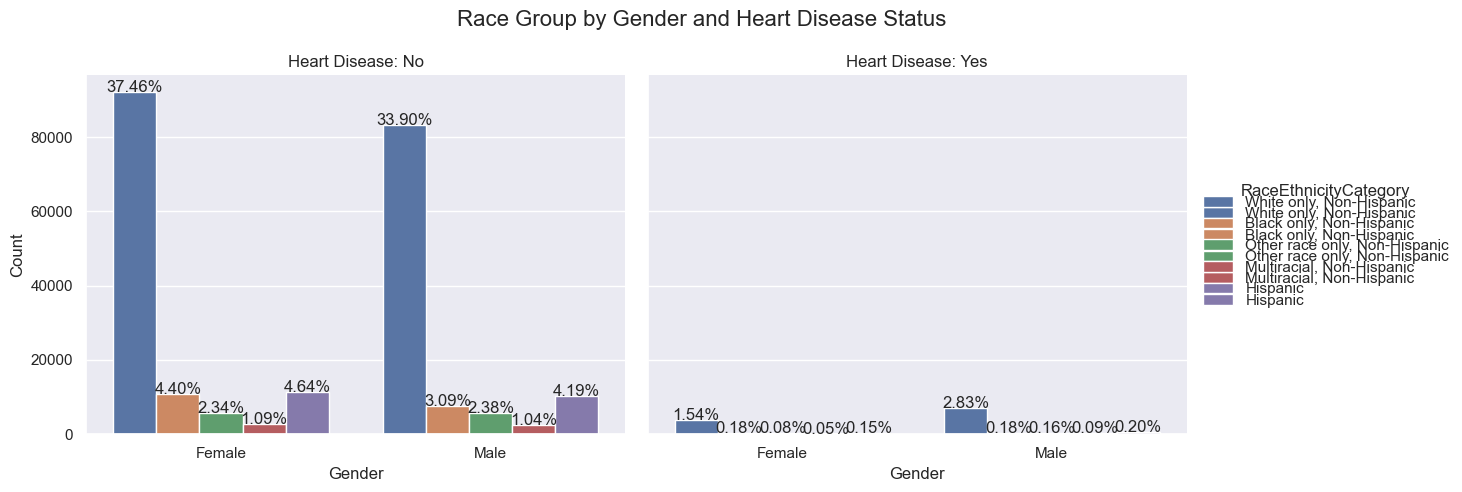

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid countplot with 'HeartDisease' as the column facet
g = sns.catplot(
    x="Sex",
    hue="RaceEthnicityCategory",
    col="HeartDisease",
    data=data,
    kind="count",
    height=5,
    aspect=1
)

# Add percentages on top of each bar
total = len(data)
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.05, 
            f'{height/total:.2%}', 
            ha="center"
        )

# Set titles and labels
g.set_titles("Heart Disease: {col_name}")
g.set_axis_labels("Gender", "Count")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Race Group by Gender and Heart Disease Status", fontsize=16)
g.add_legend()

plt.show()

The output is a grid of countplots, one for each heart disease status. Each plot shows the distribution of sex, further broken down by race and ethnicity. This allows for a detailed comparison of the composition of the heart disease and no heart disease groups in terms of both sex and race/ethnicity.

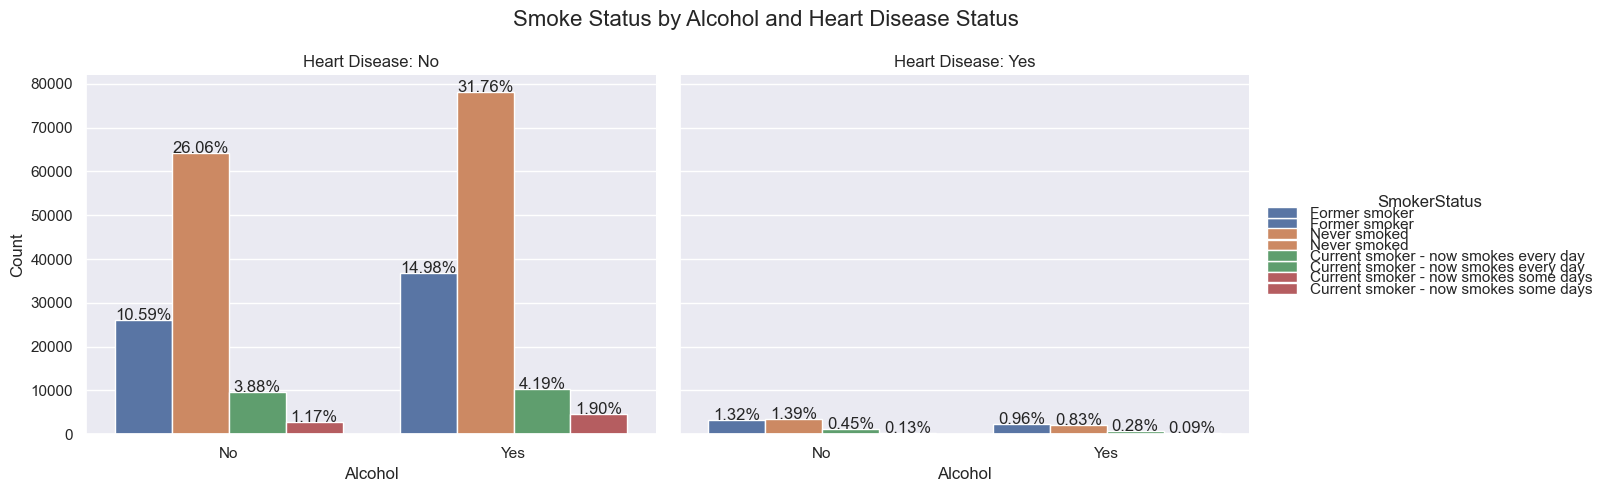

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid countplot with 'HeartDisease' as the column facet
g = sns.catplot(
    x="AlcoholDrinkers",
    hue="SmokerStatus",
    col="HeartDisease",
    data=data,
    kind="count",
    height=5,
    aspect=1
)

# Add percentages on top of each bar
total = len(data)
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.05, 
            f'{height/total:.2%}', 
            ha="center"
        )

# Set titles and labels
g.set_titles("Heart Disease: {col_name}")
g.set_axis_labels("Alcohol", "Count")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Smoke Status by Alcohol and Heart Disease Status", fontsize=16)
g.add_legend()

plt.show()

The output is a grid of countplots, one for each heart disease status. Each plot shows the distribution of alcohol drinker status, further broken down by smoking status. This allows for an examination of how the combination of alcohol consumption and smoking relates to the presence of heart disease. 

In [35]:
# Define the features
features = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 'BMI', 'RaceEthnicityCategory','HadDepressiveDisorder','AlcoholDrinkers']

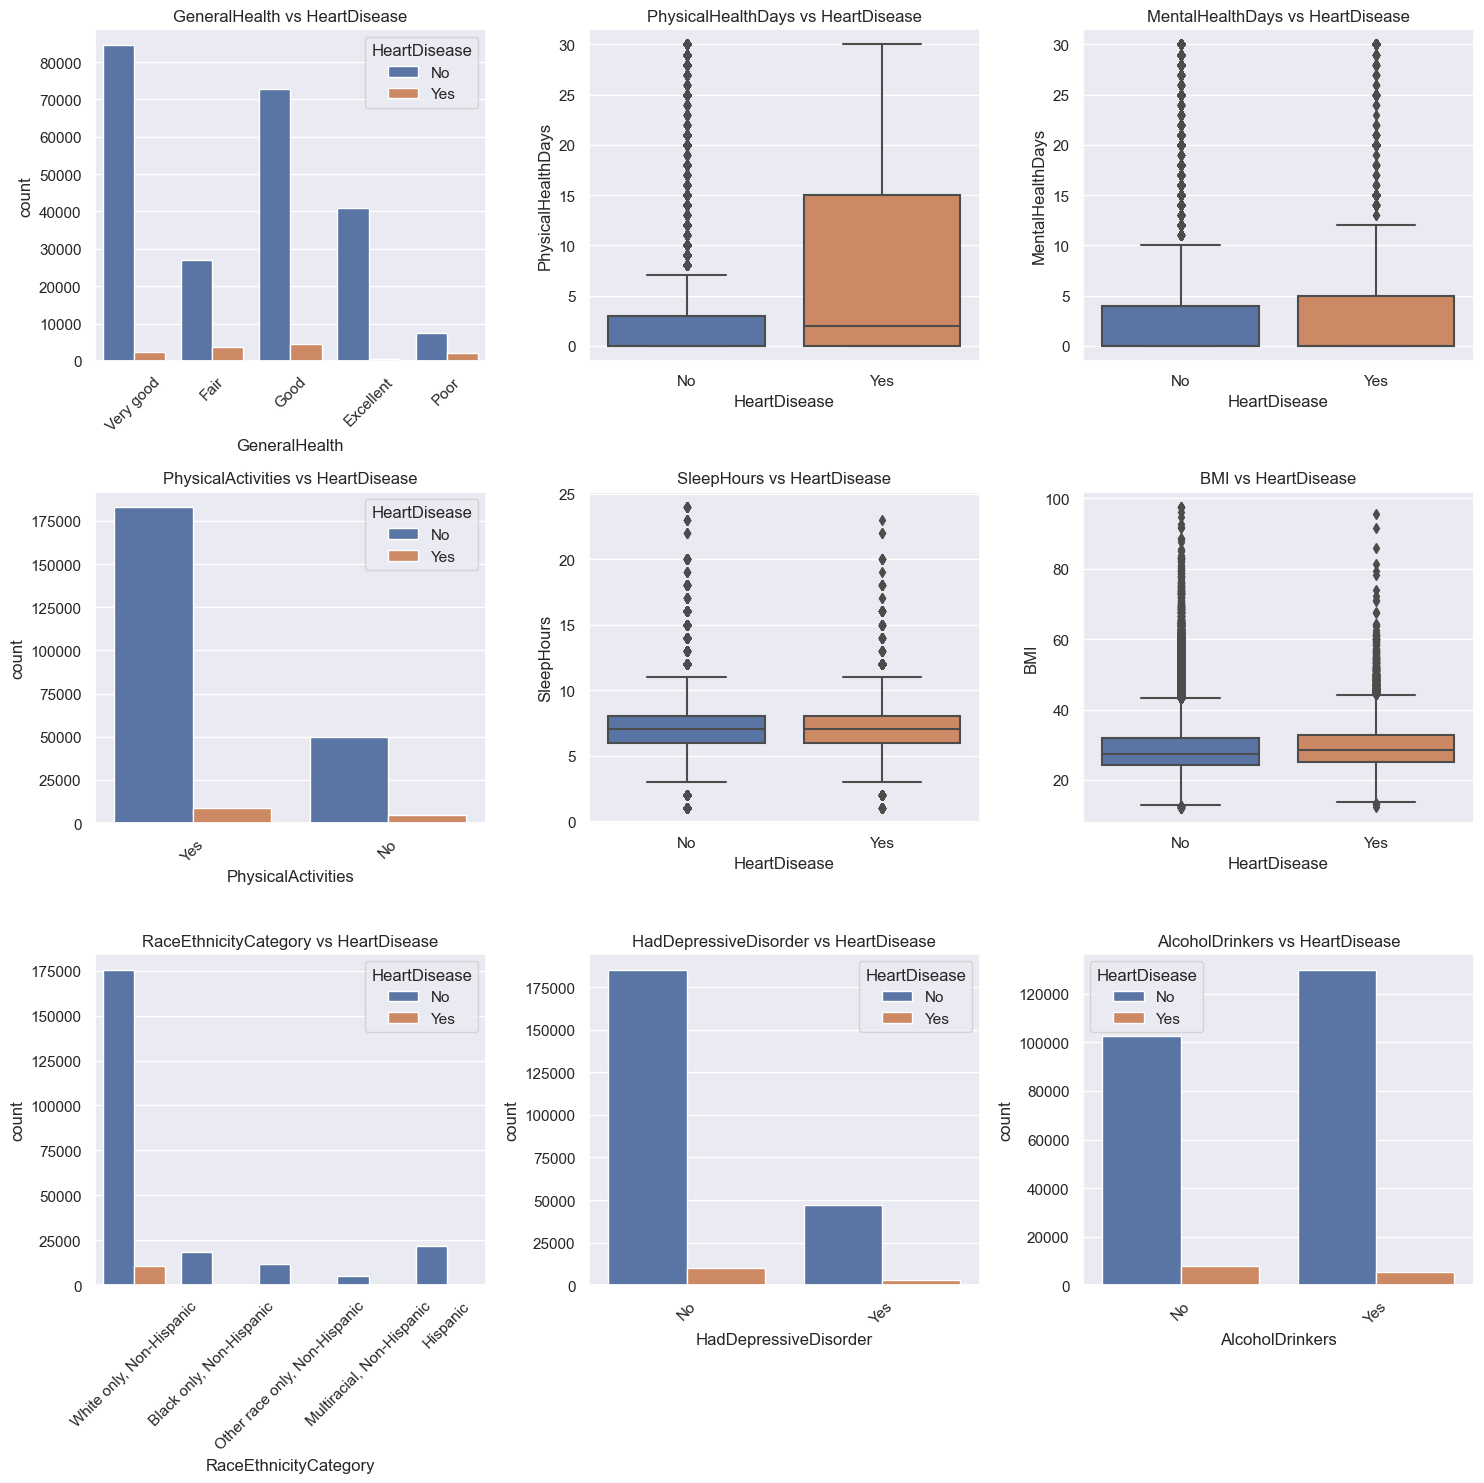

In [36]:
# Set up the plotting grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate over each feature and create plots
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Bar plot for categorical feature
    if data[feature].dtype == 'object':
        sns.countplot(x=feature, hue='HeartDisease', data=data, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs HeartDisease')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    # Box plot for numerical feature
    else:
        sns.boxplot(x='HeartDisease', y=feature, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs HeartDisease')

plt.tight_layout()

The output is a 3x3 grid containing nine plots. For categorical features like 'GeneralHealth', 'PhysicalActivities', 'RaceEthnicityCategory', 'HadDepressiveDisorder', and 'AlcoholDrinkers', countplots show the distribution of each category against heart disease. For numerical features like 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', and 'BMI', box plots show the distribution of values for individuals with and without heart disease. This comprehensive grid allows for a quick visual assessment of the relationship between several key features and heart disease.

A LabelEncoder() is initialized. The code then iterates through all columns with a data type of 'object' (which are the categorical columns). For each categorical column, label_encoder.fit_transform() converts the categorical values into numerical labels. This is a necessary step for many machine learning algorithms that require numerical input.

In [37]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

<Axes: >

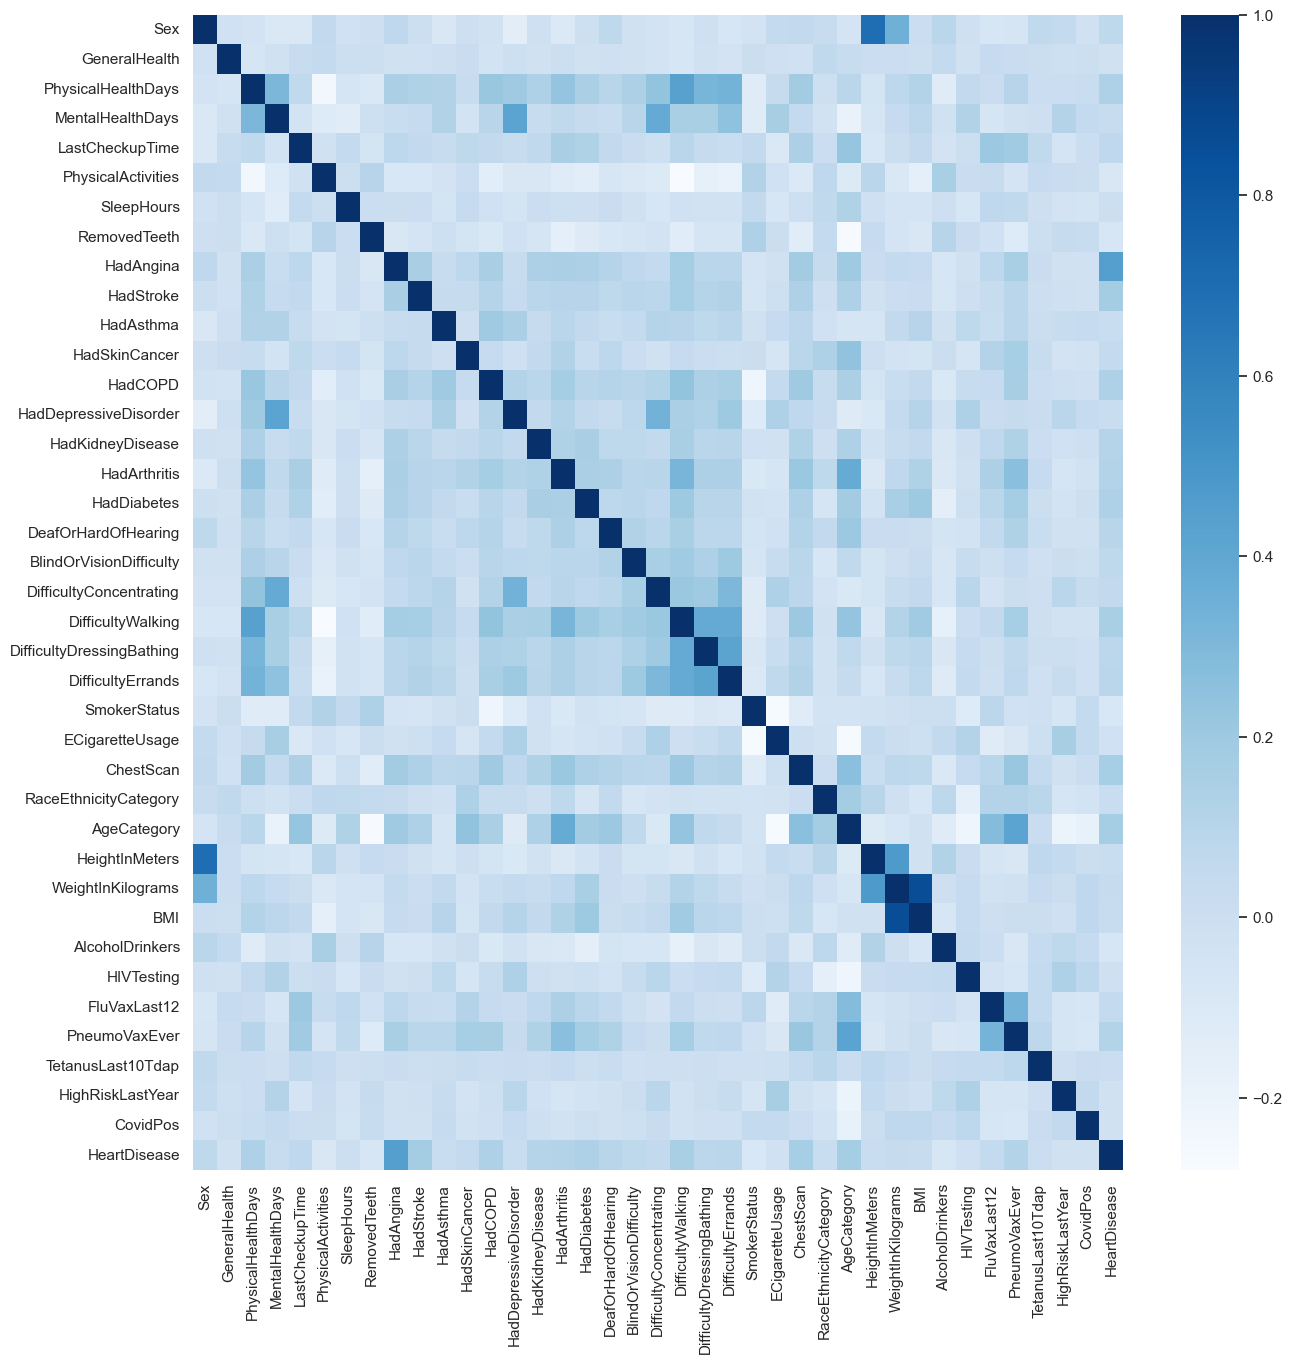

In [38]:
# Correlation map 
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap = "Blues")

The heatmap shows the correlation between all pairs of features in the dataset. The color intensity indicates the strength of the correlation, with darker blues representing stronger positive correlations. This large heatmap provides an overview of the linear relationships between all variables, including the newly encoded categorical features.